## LSTM (Long Short-Term Memory) ile Hisse Senedi Fiyatı Tahminlemesi


In [ ]:
# 1) İş Problemi (Business Problem)

• Date: İlgili İşlem Gününün tarihini temsil etmektedir.

• Open: İlgili işlem gününe ait Hisse başlangıç fiyatını temsil etmektedir.

• High: İlgili işlem gününe ait en yüksek fiyatı temsil etmektedir.

• Low: İlgili işlem gününe ait en düşük fiyatı temsil etmektedir.

• Close: İlgili işlem gününde hisse senedinin kapanış fiyatını temsil etmektedir.

• Adj Close: İlgili işlem gününe ait hisse senedinin düzeltilmiş kapanış fiyatını temsil etmektedir.

• Volume: İlgili işlem gününe ait işlem hacmi bilgisini temsil etmektedir.

In [ ]:
# https://www.kaggle.com/datasets/timoboz/tesla-stock-data-from-2010-to-2020

In [ ]:
# 2) Veriyi Anlamak (Data Understanding)

In [ ]:
# Veriyi okuma ve işleme adımında kullanılacak olan kütüphaneler import numpy as np
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# Model değerlendirme ve veriyi scale edebilmemiz için kullanılacak olan kütüphaneler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# Model için kullanılacak olan kütüphaneler
from tensorflow.keras.models import Sequential
from tensorflow. keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# Warningleri kapatmak için kullanılmaktadır.
import warnings
warnings.filterwarnings('ignore')
# Tensorflow Warning Engelleme
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.compat.v1. logging.set_verbosity(tf.compat.v1. logging. ERROR)

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
dir_path="/content/drive/MyDrive/Colab Notebooks"
df = pd.read_csv(dir_path+"/TSLA.csv")

Mounted at /content/drive


In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [ ]:
def check_df(dataframe,head=5):
  print("*****Shape*****")
  print(dataframe.shape)
  print("*****Types*****")
  print(dataframe.dtypes)
  print("*****Head*****")
  print(dataframe.head(head))
  print("*****Tail*****")
  print(dataframe.tail(head))
  print("*****NA*****")
  print(dataframe.isnull().sum())
  print("*****Quantiles*****")
  print(dataframe.quantile([0,0.5,0.50,0.95,0.99,1]).T)

In [ ]:
check_df(df)

*****Shape*****
(2416, 7)
*****Types*****
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
*****Head*****
         Date       Open   High        Low      Close  Adj Close    Volume
0  2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1  2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2  2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
3  2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
4  2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900
*****Tail*****
            Date        Open        High         Low       Close   Adj Close  \
2411  2020-01-28  568.489990  576.809998  558.080017  566.900024  566.900024   
2412  2020-01-29  575.690002  589.799988  567.429993  580.989990  580.989990   
2413  2020-01-30  632.419983  650.880005  618.000000  640.809998  640.809998 

In [ ]:
df["Date"]=pd.to_datetime(df["Date"])

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [ ]:
tesla_df=df[["Date","Close"]]

In [ ]:
tesla_df.head()

,Date,Close
0,2010-06-29,23.889999
1,2010-06-30,23.830000
2,2010-07-01,21.959999
3,2010-07-02,19.200001
4,2010-07-06,16.110001


In [ ]:
print("Min Date: ",tesla_df["Date"].min())
print("Max Date: ",tesla_df["Date"].max())

Min Date:  2010-06-29 00:00:00
Max Date:  2020-02-03 00:00:00


In [ ]:
tesla_df.index

RangeIndex(start=0, stop=2416, step=1)

In [ ]:
tesla_df.index=tesla_df["Date"]

In [ ]:
tesla_df

,Date,Close
Date,,
2010-06-29,2010-06-29,23.889999
2010-06-30,2010-06-30,23.830000
2010-07-01,2010-07-01,21.959999
2010-07-02,2010-07-02,19.200001
2010-07-06,2010-07-06,16.110001
...,...,...
2020-01-28,2020-01-28,566.900024
2020-01-29,2020-01-29,580.989990
2020-01-30,2020-01-30,640.809998


In [ ]:
tesla_df.drop("Date",axis=1,inplace=True)

In [ ]:
tesla_df

,Close
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001
...,...
2020-01-28,566.900024
2020-01-29,580.989990
2020-01-30,640.809998


In [ ]:
result_df=tesla_df.copy()

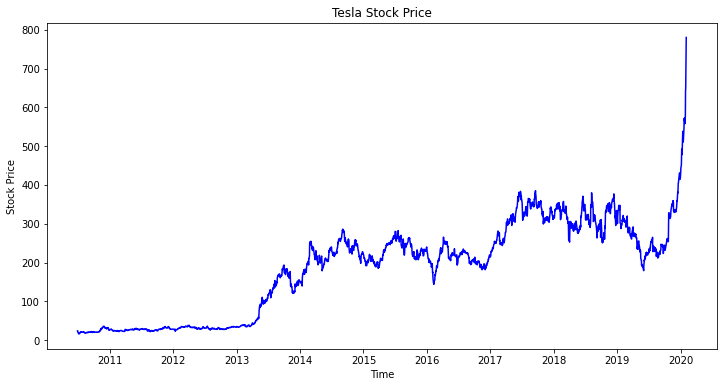

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(tesla_df["Close"],color="blue");
plt.ylabel("Stock Price")
plt.title("Tesla Stock Price")
plt.xlabel("Time")
plt.show()

In [ ]:
tesla_df=tesla_df.values

In [ ]:
tesla_df[0:5]

array([[23.889999],
       [23.83    ],
       [21.959999],
       [19.200001],
       [16.110001]])

In [ ]:
tesla_df=tesla_df.astype("float32")

In [ ]:
type(tesla_df[0])

numpy.ndarray

In [ ]:
# train test ayırmak

In [ ]:
def split_data(dataframe,test_size):
  pos=int(round(len(dataframe)*(1-test_size)))
  train=dataframe[:pos]
  test=dataframe[pos:]
  return train,test,pos

In [ ]:
train,test,pos=split_data(tesla_df,0.20)

In [ ]:
print(train.shape,test.shape)

(1933, 1) (483, 1)


In [ ]:
scaler_train=MinMaxScaler(feature_range=(0,1))

In [ ]:
train=scaler_train.fit_transform(train)

In [ ]:
scaler_test=MinMaxScaler(feature_range=(0,1))

In [ ]:
test=scaler_test.fit_transform(test)

In [ ]:
train[0:5]

array([[0.02191224],
       [0.02174973],
       [0.01668472],
       [0.0092091 ],
       [0.00083966]], dtype=float32)

In [ ]:
test[0:5]

array([[0.25685903],
       [0.24829045],
       [0.25511202],
       [0.24978784],
       [0.2465767 ]], dtype=float32)

In [ ]:
def create_features(data,lookback):
  X,Y=[],[]
  for i in range(lookback,len(data)):
    X.append(data[i-lookback:i,0])
    Y.append(data[i,0])

  return np.array(X), np.array(Y)

In [ ]:
lookback=20
# hafta icleri 

In [ ]:
X_train,y_train=create_features(train,lookback)
X_test,y_test=create_features(test,lookback)

In [ ]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(1913, 20) (1913,) (463, 20) (463,)


In [ ]:
X_train[0:5]

array([[0.02191224, 0.02174973, 0.01668472, 0.0092091 , 0.00083966,
        0.        , 0.00449621, 0.00433369, 0.0033857 , 0.00633803,
        0.01094258, 0.011078  , 0.01310942, 0.0165493 , 0.01218851,
        0.01197183, 0.01408451, 0.01486999, 0.01394908, 0.01286566],
       [0.02174973, 0.01668472, 0.0092091 , 0.00083966, 0.        ,
        0.00449621, 0.00433369, 0.0033857 , 0.00633803, 0.01094258,
        0.011078  , 0.01310942, 0.0165493 , 0.01218851, 0.01197183,
        0.01408451, 0.01486999, 0.01394908, 0.01286566, 0.01332611],
       [0.01668472, 0.0092091 , 0.00083966, 0.        , 0.00449621,
        0.00433369, 0.0033857 , 0.00633803, 0.01094258, 0.011078  ,
        0.01310942, 0.0165493 , 0.01218851, 0.01197183, 0.01408451,
        0.01486999, 0.01394908, 0.01286566, 0.01332611, 0.01232395],
       [0.0092091 , 0.00083966, 0.        , 0.00449621, 0.00433369,
        0.0033857 , 0.00633803, 0.01094258, 0.011078  , 0.01310942,
        0.0165493 , 0.01218851, 0.01197183, 0

In [ ]:
y_train[0:5]

array([0.01332611, 0.01232395, 0.01121344, 0.01386782, 0.01665764],
      dtype=float32)

In [ ]:
X_train=np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))
X_test=np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(1913, 1, 20) (1913, 1) (463, 1, 20) (463, 1)


In [ ]:
# 4) Modelleme (Modeling)

In [ ]:
model=Sequential()

model.add(LSTM(units=50,
               activation="relu",
               input_shape=(X_train.shape[1],lookback)))
model.add(Dropout(0.2))
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                14200     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 14,251
Trainable params: 14,251
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# optimizasyon ve degerlendirme 

In [ ]:
model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
callbacks=[EarlyStopping(monitor="val_loss",patience=3,verbose=1,mode="min"),
           ModelCheckpoint(filepath="mymodel.h5",monitor="val_loss",mode="min",save_best_only=True,save_weights_only=False,verbose=1)]

In [ ]:
history=model.fit(x=X_train,
                  y=y_train,
                  epochs=100,
                  batch_size=20,
                  validation_data=(X_test,y_test),
                  callbacks=callbacks,
                  shuffle=False)

Epoch 1/100
84/96 [=========================>....] - ETA: 0s - loss: 0.0093
Epoch 1: val_loss improved from inf to 0.00450, saving model to mymodel.h5
96/96 [==============================] - 2s 5ms/step - loss: 0.0106 - val_loss: 0.0045
Epoch 2/100
96/96 [==============================] - ETA: 0s - loss: 0.0093
Epoch 2: val_loss improved from 0.00450 to 0.00421, saving model to mymodel.h5
96/96 [==============================] - 0s 3ms/step - loss: 0.0093 - val_loss: 0.0042
Epoch 3/100
77/96 [=======================>......] - ETA: 0s - loss: 0.0062
Epoch 3: val_loss improved from 0.00421 to 0.00383, saving model to mymodel.h5
96/96 [==============================] - 0s 3ms/step - loss: 0.0075 - val_loss: 0.0038
Epoch 4/100
86/96 [=========================>....] - ETA: 0s - loss: 0.0058
Epoch 4: val_loss improved from 0.00383 to 0.00361, saving model to mymodel.h5
96/96 [==============================] - 0s 3ms/step - loss: 0.0072 - val_loss: 0.0036
Epoch 5/100
75/96 [=================

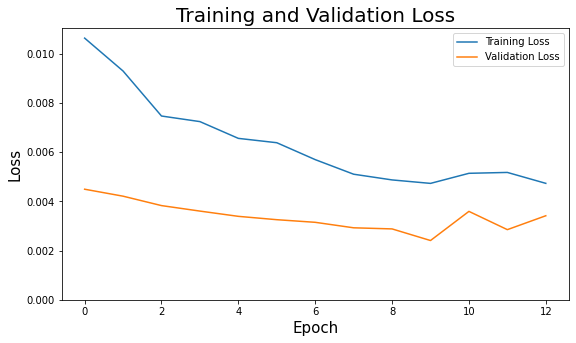

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(history.history["loss"],label="Training Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.legend(loc="upper right")
plt.xlabel("Epoch",fontsize=15)
plt.ylabel("Loss",fontsize=15)
plt.ylim([0,max(plt.ylim())])
plt.title("Training and Validation Loss",fontsize=20)
plt.show()

In [ ]:
# 5) Değerlendirme (Evaluation)

In [ ]:
loss=model.evaluate(X_test,y_test,batch_size=1)

463/463 [==============================] - 1s 3ms/step - loss: 0.0034


In [ ]:
print("Test Loss: %.1f%%"%(100.0*loss))

Test Loss: 0.3%


In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

15/15 [==============================] - 0s 1ms/step


In [ ]:
train_predict=scaler_train.inverse_transform(train_predict)
test_predict=scaler_test.inverse_transform(test_predict)

In [ ]:
y_train=scaler_train.inverse_transform(y_train)
y_test=scaler_test.inverse_transform(y_test)

In [ ]:
train_rmse=np.sqrt(mean_squared_error(y_train,train_predict))

In [ ]:
test_rmse=np.sqrt(mean_squared_error(y_test,test_predict))

In [ ]:
print(f"Train RMSE :{train_rmse}")
print(f"Test RMSE :{test_rmse}")

Train RMSE :15.602337837219238
Test RMSE :35.13547134399414


In [ ]:
train_prediction_df=result_df[lookback:pos]
train_prediction_df["Predicted"]=train_predict
train_prediction_df.head()

,Close,Predicted
Date,,
2010-07-28,20.719999,34.884293
2010-07-29,20.350000,34.957520
2010-07-30,19.940001,34.985943
2010-08-02,20.920000,34.995537
2010-08-03,21.950001,35.041046


In [ ]:
test_prediction_df=result_df[pos+lookback:]
test_prediction_df["Predicted"]=test_predict
test_prediction_df.head()

,Close,Predicted
Date,,
2018-04-03,267.529999,332.247162
2018-04-04,286.940002,329.141632
2018-04-05,305.720001,324.993835
2018-04-06,299.299988,323.944031
2018-04-09,289.660004,323.177216


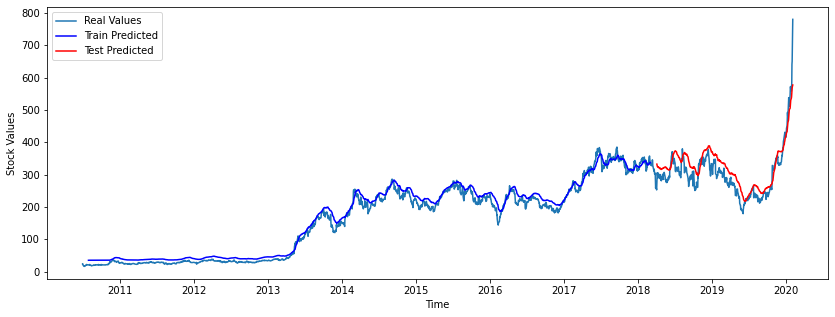

In [ ]:
# Train test tahminlerini görselleştirme

plt.figure(figsize=(14,5))
plt.plot(result_df,label="Real Values")
plt.plot(train_prediction_df["Predicted"],color="blue",label="Train Predicted")
plt.plot(test_prediction_df["Predicted"],color="red",label="Test Predicted")
plt.xlabel("Time")
plt.ylabel("Stock Values")
plt.legend()
plt.show()